<a href="https://colab.research.google.com/github/Tashhfia/MINST-Playground/blob/main/Playing_around_with_MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import keras
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.1


In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [ ]:
y_train[2]

4

### Displaying a random image

Text(0.5, 1.0, 'Label: 3')

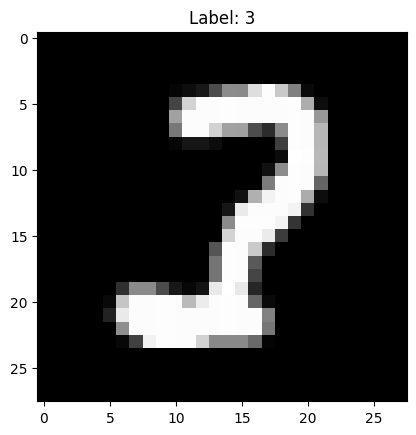

In [ ]:
rand_img = np.random.randint(0, x_train.shape[0])


plt.imshow(x_train[rand_img], cmap='gray')
plt.title(f'Label: {y_train[rand_img]}')

In [ ]:
x_train[rand_img].shape

(28, 28)

In [ ]:
x_train.shape    # we need to add the channel because CNN expects (batch_size, height, width, channels)

(60000, 28, 28)

In [ ]:
# normalize data to pixel values range from 0-255.
# Dividing by 255 scales the values to [0, 1], which helps in faster convergence.
# The images in MINST are stored as 8-bit integers so we need to convert to 32 bit
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
# adding a new axis at the end to hold the channel
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [ ]:
# this step is not needed since we are using sparse_categorical_crossentropy
# convert labels to onehot encoding form because thats what softmax expects
# y_train = keras.utils.to_categorical(y_train, 10)
# y_test =  keras.utils.to_categorical(y_test, 10)


In [ ]:
y_train[2]

4

In [ ]:
model = models.Sequential()

model.add(layers.Input(shape=(28, 28, 1)))  # stage 1
model.add(layers.Conv2D(8, (3,3), padding = 'same', activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(16, (3,3), padding = 'same', activation = 'relu')) # stage 2
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'))  # stage 3
model.add(layers.Flatten())   # stage 4
model.add(layers.Dense(128, activation = 'relu')) # stage 5
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation = 'softmax')) # stage 6

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         200,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 208,010 (812.54 KB)

 Trainable params: 208,010 (812.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# sets configuation for optimizer, loss function, metrics, eager execution.
# Can be run multiple times, it will just overwrite the settings set previously.
model.compile(optimizer = Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the model
epoch = 10
batch_size = 128

m = model.fit(x_train, y_train,
              validation_data = (x_test, y_test),
              epochs = epoch)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - acc: 0.7369 - loss: 0.9041 - val_acc: 0.9540 - val_loss: 0.1556
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - acc: 0.9436 - loss: 0.1842 - val_acc: 0.9682 - val_loss: 0.1008
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - acc: 0.9618 - loss: 0.1231 - val_acc: 0.9758 - val_loss: 0.0750
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - acc: 0.9708 - loss: 0.0980 - val_acc: 0.9809 - val_loss: 0.0577
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - acc: 0.9749 - loss: 0.0846 - val_acc: 0.9823 - val_loss: 0.0528
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - acc: 0.9780 - loss: 0.0710 - val_acc: 0.9828 - val_loss: 0.0515
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - acc: 0.9810 - loss: 0.0618 - val_acc: 0.9865 - val_loss: 0.0411
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - acc: 0.9834 - loss: 0.0546 - val_acc: 0.9853 - val_loss: 0.0434
Epoch 9/10
1875/1875 ━━━

In [ ]:
m.history

{'acc': [0.8585666418075562,
  0.949483335018158,
  0.9639999866485596,
  0.9720166921615601,
  0.9764333367347717,
  0.9783999919891357,
  0.9811333417892456,
  0.9833666682243347,
  0.9845166802406311,
  0.9855999946594238],
 'loss': [0.4846794903278351,
  0.16512274742126465,
  0.11831630021333694,
  0.0942196473479271,
  0.07893869280815125,
  0.06958344578742981,
  0.061695028096437454,
  0.054183896631002426,
  0.0499742366373539,
  0.04640332609415054],
 'val_acc': [0.9539999961853027,
  0.9682000279426575,
  0.9757999777793884,
  0.98089998960495,
  0.9822999835014343,
  0.9828000068664551,
  0.9865000247955322,
  0.9853000044822693,
  0.9868999719619751,
  0.9886999726295471],
 'val_loss': [0.15559472143650055,
  0.10075768083333969,
  0.07499807327985764,
  0.057700224220752716,
  0.0528307668864727,
  0.05146341025829315,
  0.04108905419707298,
  0.04339158535003662,
  0.037754617631435394,
  0.03492940962314606]}

Text(0, 0.5, 'Accuracy')

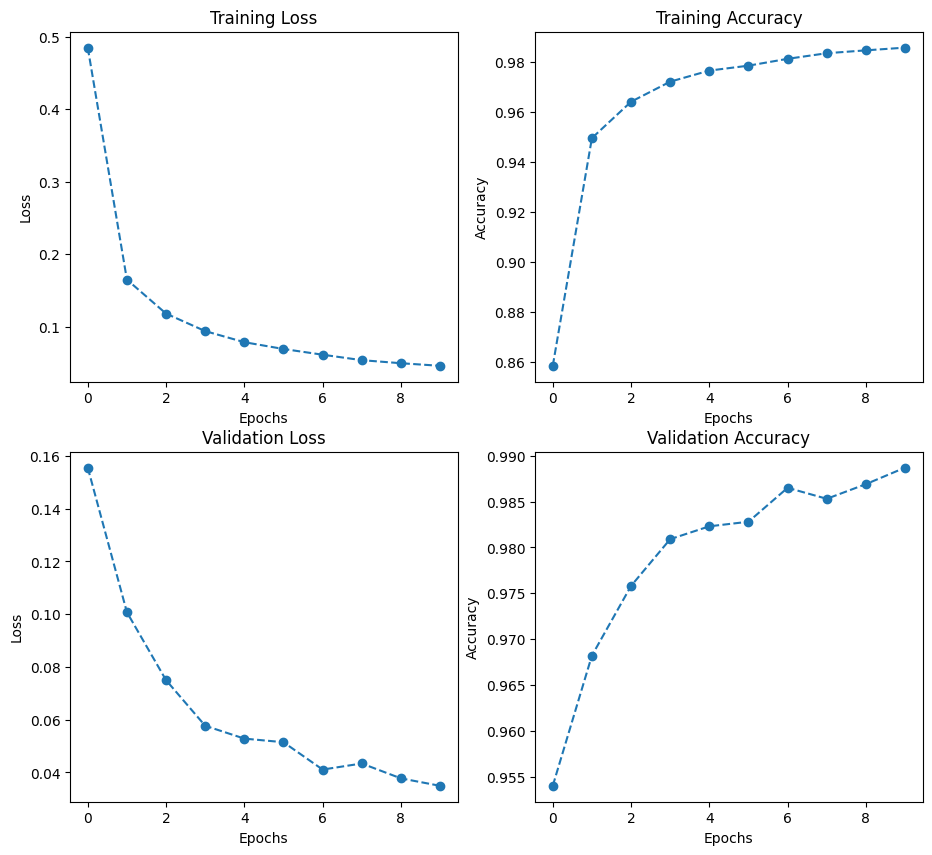

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(11, 10))
# loss
axes[0, 0].plot(m.history['loss'], linestyle='dashed', marker='o')
axes[0, 0].title.set_text('Training Loss')
axes[1, 0].plot(m.history['val_loss'], linestyle='dashed', marker='o')
axes[1, 0].title.set_text('Validation Loss')
# accuracy
axes[0, 1].plot(m.history['acc'], linestyle='dashed', marker='o')
axes[0, 1].title.set_text('Training Accuracy')
axes[1, 1].plot(m.history['val_acc'], linestyle='dashed', marker='o')
axes[1, 1].title.set_text('Validation Accuracy')

axes[0, 0].set_xlabel('Epochs')
axes[0, 1].set_xlabel('Epochs')
axes[1, 0].set_xlabel('Epochs')
axes[1, 1].set_xlabel('Epochs')

axes[0, 0].set_ylabel('Loss')
axes[0, 1].set_ylabel('Accuracy')
axes[1, 0].set_ylabel('Loss')
axes[1, 1].set_ylabel('Accuracy')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03492940962314606
Test accuracy: 0.9886999726295471


In [ ]:
score

[0.03492940962314606, 0.9886999726295471]